In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=140)

1. 使用合适的初始点, 利用牛顿方法找出所有解. 用习题3进行检查确保结果正确
$$
(a)\;
\begin{cases}
u^2+v^2=1\\
(u-1)^2+v^2=1
\end{cases}
\quad
(b)\;
\begin{cases}
u^2+4v^2=4\\
4u^2+v^2=4
\end{cases}
\quad
(c)\;
\begin{cases}
u^2-4v^2=4\\
(u-1)^2+v^2=4
\end{cases}
$$

In [39]:
def Newton(x, DF, F, tolerance=1e-15, maxIter=100, printOrNot=True):
    count = 0
    step = np.full(len(x), np.inf)

    print(f'Initial estimation: {x}')
    while(count <= maxIter):
        count += 1
        error = np.linalg.norm(F(*x), np.inf)
        if printOrNot:
            print(f'Iter of {count}, error={error}')
        if error<= tolerance:
            print("    Break")
            break
        df = DF(*x)
        b = F(*x)
        try:
            step = np.linalg.solve(df, b)
        except np.linalg.LinAlgError as e:
            print(e)
            return None
        x = x-step
    
    print('    count: ', count)
    print('    err: ', error)
    print('    x: ', x)
    return x

In [5]:
DF_a = lambda u, v: np.array([[2*u, 2*v], [2*(u-1), 2*v]])
F_a = lambda u, v: np.array([u**2+v**2-1, (u-1.)**2+v**2-1])
x = Newton((1.,1.), DF_a, F_a)
x = Newton((1.,-1.), DF_a, F_a)

Iter of 1, error=1.0
Iter of 2, error=0.25
Iter of 3, error=0.015625
Iter of 4, error=7.971938775508391e-05
Iter of 5, error=2.11816852946356e-09
Iter of 6, error=1.1102230246251565e-16
    Break
    x:  [0.5       0.8660254]
Iter of 1, error=1.0
Iter of 2, error=0.25
Iter of 3, error=0.015625
Iter of 4, error=7.971938775508391e-05
Iter of 5, error=2.11816852946356e-09
Iter of 6, error=1.1102230246251565e-16
    Break
    x:  [ 0.5       -0.8660254]


In [6]:
# Seems like there are two ellipses perpendicular to each other.
DF_b = lambda u, v: np.array([[2*u, 8*v], [8*u, 2*v]])
F_b = lambda u, v: np.array([u**2+4*v**2-4, 4*u**2+v**2-4])
x = Newton((1.,1.), DF_b, F_b)
x = Newton((1.,-1.), DF_b, F_b)
x = Newton((-1.,1.), DF_b, F_b)
x = Newton((-1.,-1.), DF_b, F_b)

Iter of 1, error=1.0
Iter of 2, error=0.05000000000000071
Iter of 3, error=0.00015432098765355562
Iter of 4, error=1.4883783094887804e-09
Iter of 5, error=4.440892098500626e-16
    Break
    x:  [0.89442719 0.89442719]
Iter of 1, error=1.0
Iter of 2, error=0.05000000000000071
Iter of 3, error=0.00015432098765355562
Iter of 4, error=1.4883783094887804e-09
Iter of 5, error=4.440892098500626e-16
    Break
    x:  [ 0.89442719 -0.89442719]
Iter of 1, error=1.0
Iter of 2, error=0.05000000000000071
Iter of 3, error=0.00015432098765355562
Iter of 4, error=1.4883783094887804e-09
Iter of 5, error=4.440892098500626e-16
    Break
    x:  [-0.89442719  0.89442719]
Iter of 1, error=1.0
Iter of 2, error=0.05000000000000071
Iter of 3, error=0.00015432098765355562
Iter of 4, error=1.4883783094887804e-09
Iter of 5, error=4.440892098500626e-16
    Break
    x:  [-0.89442719 -0.89442719]


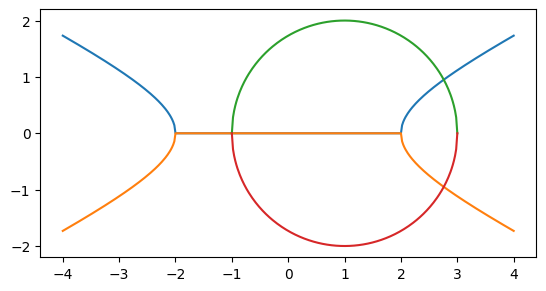

In [21]:
fig, ax = plt.subplots()
X1 = np.concatenate((np.linspace(-4, -2, 100), np.linspace(2, 4, 100)))
X2 = np.linspace(-1, 3, 200)
ax.set_aspect(1)
ax.plot(X1,  np.sqrt((X1**2-4)/4))
ax.plot(X1, -np.sqrt((X1**2-4)/4))
ax.plot(X2,  np.sqrt(4-(X2-1)**2))
ax.plot(X2, -np.sqrt(4-(X2-1)**2))

In [19]:
# A hyperbola and a circle moved to right.
DF_c = lambda u, v: np.array([[2*u, -8*v], [2*(u-1), 2*v]])
F_c = lambda u, v: np.array([u**2-4*v**2-4, (u-1.)**2+v**2-4])
x = Newton((1.,1.), DF_c, F_c)
x = Newton((1.,-1.), DF_c, F_c)

Iter of 1, error=7.0
Iter of 2, error=92.5
Iter of 3, error=22.317634711446484
Iter of 4, error=4.803899462875284
Iter of 5, error=0.6720753795401455
Iter of 6, error=0.024674499016540175
Iter of 7, error=3.7942294188297865e-05
Iter of 8, error=9.070610929029499e-11
Iter of 9, error=8.881784197001252e-16
    Break
    x:  [2.75959179 0.95070328]
Iter of 1, error=7.0
Iter of 2, error=92.5
Iter of 3, error=22.317634711446484
Iter of 4, error=4.803899462875284
Iter of 5, error=0.6720753795401455
Iter of 6, error=0.024674499016540175
Iter of 7, error=3.7942294188297865e-05
Iter of 8, error=9.070610929029499e-11
Iter of 9, error=8.881784197001252e-16
    Break
    x:  [ 2.75959179 -0.95070328]


2. 使用牛顿方法找出例2.31的三个解(实为2.33).
$$
\begin{aligned}
f_1(u,v)=6u^3+uv-3v^3-4&=0 \\
f_2(u,v)=u^2-18uv^2+16v^3+1&=0
\end{aligned}
$$

In [26]:
DF_2 = lambda u, v: np.array([[18*u**2+v, u-9*v**2], [2*u-18*v**2, -36*u*v+48*v**2]])
F_2 = lambda u, v: np.array([6*u**3+u*v-3*v**3-4, u**2-18*u*v**2+16*v**3+1])


x = Newton((2.,2.), DF_2, F_2)
x = Newton((.1,.3), DF_2, F_2)
x = Newton((1.,-1.), DF_2, F_2)

Iter of 1, error=24.0
Iter of 2, error=6.131641909469305
Iter of 3, error=1.1501292698625658
Iter of 4, error=0.08056829868084492
Iter of 5, error=0.00046040951679593434
Iter of 6, error=1.6640377964449726e-08
Iter of 7, error=0.0
    Break
    x:  [1. 1.]
Iter of 1, error=4.045
Iter of 2, error=64912.118555244764
Iter of 3, error=19232.280326901047
Iter of 4, error=5697.480068626225
Iter of 5, error=1687.1470114851163
Iter of 6, error=498.8868423652439
Iter of 7, error=146.8049595323197
Iter of 8, error=42.49467071145373
Iter of 9, error=11.637727541310152
Iter of 10, error=2.6509260452894816
Iter of 11, error=0.33519818595658535
Iter of 12, error=0.007958530797268715
Iter of 13, error=3.7643965375977473e-06
Iter of 14, error=8.668621376273222e-13
Iter of 15, error=8.881784197001252e-16
    Break
    x:  [0.86593892 0.46216792]
Iter of 1, error=32.0
Iter of 2, error=8.855654073736913
Iter of 3, error=2.156180632786871
Iter of 4, error=0.348790979232497
Iter of 5, error=0.0171894202903

3. 使用牛方法找出如下方程组的两个解
$$
\begin{aligned}
u^3-v^3+u=0\\
u^2+v^2=1
\end{aligned}
$$

In [42]:
DF_3 = lambda u, v: np.array([[3*u**2+1, -3*v**2], [2*u, 2*v]])
F_3 = lambda u, v: np.array([u**3-v**3+u, u*2+v**2-1])
for x in np.linspace(-5, 5, 5):
    for y in np.linspace(-5, 5, 5):
        s = Newton((x, y), DF_3, F_3, printOrNot=False, maxIter=1000)
# [0.27687609 0.66801784] and [-2.16406748 -2.30827532]

Initial estimation: (-5.0, -5.0)
    Break
    count:  115
    err:  8.881784197001252e-16
    x:  [-2.16406748 -2.30827532]
Initial estimation: (-5.0, -2.5)
    Break
    count:  115
    err:  8.881784197001252e-16
    x:  [-2.16406748 -2.30827532]
Initial estimation: (-5.0, 0.0)
Singular matrix
Initial estimation: (-5.0, 2.5)
    Break
    count:  204
    err:  8.881784197001252e-16
    x:  [0.27687609 0.66801784]
Initial estimation: (-5.0, 5.0)
    Break
    count:  174
    err:  8.881784197001252e-16
    x:  [0.27687609 0.66801784]
Initial estimation: (-2.5, -5.0)
    Break
    count:  111
    err:  8.881784197001252e-16
    x:  [-2.16406748 -2.30827532]
Initial estimation: (-2.5, -2.5)
    Break
    count:  108
    err:  8.881784197001252e-16
    x:  [-2.16406748 -2.30827532]
Initial estimation: (-2.5, 0.0)
Singular matrix
Initial estimation: (-2.5, 2.5)
    Break
    count:  168
    err:  8.881784197001252e-16
    x:  [0.27687609 0.66801784]
Initial estimation: (-2.5, 5.0)
    Br

4. 使用牛顿方法找出如下三个方程的两个解.
$$
\begin{aligned}
2u^2-4u+v^2+3w^2+6w+2=&0\\
u^2+v^2-2v+2w^2-5=&0\\
3u^2-12u+v^2+3w^2+8=&0
\end{aligned}
$$

In [50]:
DF_4 = lambda u, v, w: np.array([
    [4*u-4, 2*v, 6*w+6],
    [2*u, 2*v-2, 4*w],
    [6*u-12, 2*v, 6*w]
])
F_4 = lambda u, v, w: np.array([
    2*u**2-4*u+v**2+3*w**2+6*w+2,
    u**2+v**2-2*v+2*w**2-5,
    3*u**2-12*u+v**2+3*w**2+8
])

solutions = []
for x in np.linspace(-5, 5, 5):
    for y in np.linspace(-5, 5, 5):
        for z in np.linspace(-5, 5, 5):
            s = Newton((x, y, z), DF_4, F_4, printOrNot=False, maxIter=1000)
            solutions.append(str(s))
print(set(solutions))


Initial estimation: (-5.0, -5.0, -5.0)
    Break
    count:  28
    err:  0.0
    x:  [ 2.  1. -1.]
Initial estimation: (-5.0, -5.0, -2.5)
    Break
    count:  12
    err:  8.881784197001252e-16
    x:  [ 1.09601784 -1.15924718 -0.26114794]
Initial estimation: (-5.0, -5.0, 0.0)
    Break
    count:  11
    err:  8.881784197001252e-16
    x:  [ 1.09601784 -1.15924718 -0.26114794]
Initial estimation: (-5.0, -5.0, 2.5)
    Break
    count:  9
    err:  8.881784197001252e-16
    x:  [ 1.09601784 -1.15924718 -0.26114794]
Initial estimation: (-5.0, -5.0, 5.0)
    Break
    count:  9
    err:  8.881784197001252e-16
    x:  [ 1.09601784 -1.15924718 -0.26114794]
Initial estimation: (-5.0, -2.5, -5.0)
    Break
    count:  29
    err:  0.0
    x:  [ 2.  1. -1.]
Initial estimation: (-5.0, -2.5, -2.5)
    Break
    count:  11
    err:  8.881784197001252e-16
    x:  [ 1.09601784 -1.15924718 -0.26114794]
Initial estimation: (-5.0, -2.5, 0.0)
    count:  1001
    err:  1.7763568394002505e-15
    x: 

5. 使用多元牛顿方法找出三维空间中三个给定球的两个交点.
    - (a)每个球的半径都是1，球心在 $(1,1,0)$, $(1,0,1)$, 以及 $(0,1,1)$. (答案是 $(1,1,1)$ 和 $(1/3,1/3,1/3)$)
    - (b)每个球半径是5，球心在 $(1,-2,0)$, $(-2,2,-1)$，以及 $(4,-2,3)$.

In [55]:
DF_5a = lambda u, v, w: np.array([
    [2*u, 2*v, 2*w],
    [2*u, 2*v, 2*w],
    [2*u, 2*v, 2*w]
])
# TODO Jocobi matrix is singular constantly.

F_5a = lambda u, v, w: np.array([
    (u-1)**2+(v-1)**2+w**2-1,
    (u-1)**2+v**2+(w-1)**2-1,
    u**2+(v-1)**2+(w-1)**2-1,
])

solutions = []
for x in np.linspace(-3, 3, 10):
    for y in np.linspace(-3, 3, 10):
        for z in np.linspace(-3, 3, 10):
            s = Newton((x, y, z), DF_5a, F_5a, printOrNot=False, maxIter=1000)
            solutions.append(str(s))
print(set(solutions))

Initial estimation: (-3.0, -3.0, -3.0)
Singular matrix
Initial estimation: (-3.0, -3.0, -2.3333333333333335)
Singular matrix
Initial estimation: (-3.0, -3.0, -1.6666666666666667)
Singular matrix
Initial estimation: (-3.0, -3.0, -1.0)
Singular matrix
Initial estimation: (-3.0, -3.0, -0.3333333333333335)
Singular matrix
Initial estimation: (-3.0, -3.0, 0.33333333333333304)
Singular matrix
Initial estimation: (-3.0, -3.0, 1.0)
Singular matrix
Initial estimation: (-3.0, -3.0, 1.666666666666666)
Singular matrix
Initial estimation: (-3.0, -3.0, 2.333333333333333)
Singular matrix
Initial estimation: (-3.0, -3.0, 3.0)
Singular matrix
Initial estimation: (-3.0, -2.3333333333333335, -3.0)
Singular matrix
Initial estimation: (-3.0, -2.3333333333333335, -2.3333333333333335)
Singular matrix
Initial estimation: (-3.0, -2.3333333333333335, -1.6666666666666667)
Singular matrix
Initial estimation: (-3.0, -2.3333333333333335, -1.0)
Singular matrix
Initial estimation: (-3.0, -2.3333333333333335, -0.33333

In [59]:
DF_5b = lambda u, v, w: np.array([
    [2*u, 2*v, 2*w],
    [2*u, 2*v, 2*w],
    [2*u, 2*v, 2*w]
])
F_5b = lambda u, v, w: np.array([
    (u-1)**2+(v+2)**2+w**2-25,
    (u+2)**2+(v-2)**2+(w+1)**2-25,
    (u-4)**2+(v+2)**2+(w-3)**2-25,
])

Newton((1., 1., 4.), DF_5b, F_5b, printOrNot=False, maxIter=1000)


Initial estimation: (1.0, 1.0, 4.0)
Singular matrix


6. 尽管三个球在三维空间中的一般交点是两个点，它也可能是唯一点，使用多元牛顿方法找出球心在 $(1,0,1)$ 半径为 $\sqrt8$、球心在 $(0,2,2)$ 半径为 $\sqrt2$ 、球心在 $(0,3,3)$ 半径为 $\sqrt2$ 的三个球的唯一交点，这个迭代仍然二次收敛吗?请解释.

7. 对习题3的方程组，使用**Broyden方法I**，初始估计为 $(1，1), A_0=I$. 尽可能精确地报告解，以及所需要的步数.
$$
(a)\;
\begin{cases}
u^2+v^2=1\\
(u-1)^2+v^2=1
\end{cases}
\quad
(b)\;
\begin{cases}
u^2+4v^2=4\\
4u^2+v^2=4
\end{cases}
\quad
(c)\;
\begin{cases}
u^2-4v^2=4\\
(u-1)^2+v^2=4
\end{cases}
$$

8. 对习题3的方程组，使用**Broyden方法II**，初始估计为 $(1，1), A_0=I$. 尽可能精确地报告解，以及所需要的步数.

9. 使用**Broyden方法I**找出编程问题5中的两个交点.

10. 使用**Broyden方法I**找出编程问题6中的交点，你所能观测到的收敛率是多少?

11. 使用**Broyden方法Ⅱ**找出编程问题5中的两个交点.

12. 使用**Broyden方法Ⅱ**找出编程问题6中的交点，你所能观测到的收敛率是多少?